In [ ]:
pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.6 kB/s 
     |████████████████████████████████| 5.8 MB 38.5 MB/s 
     |████████████████████████████████| 438 kB 55.3 MB/s 
     |████████████████████████████████| 1.6 MB 41.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

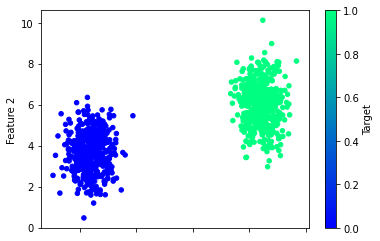

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.4088 - accuracy: 1.0000
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 1.0000
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 1.0000
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 1.0000
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 1.0000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3560 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 1.0000
Epoch 11/

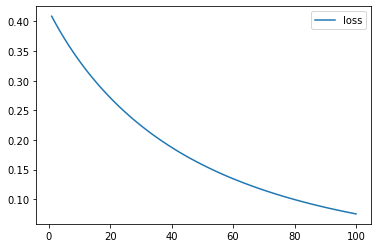

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

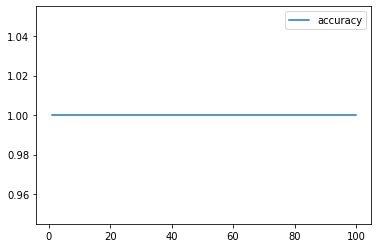

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0703 - accuracy: 1.0000 - 286ms/epoch - 36ms/step
Loss: 0.07027388364076614, Accuracy: 1.0


In [ ]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 152ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

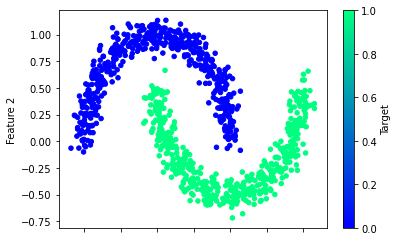

In [ ]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [ ]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [ ]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 1.1943 - accuracy: 0.4960
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0324 - accuracy: 0.5200
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9334 - accuracy: 0.5347
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8679 - accuracy: 0.5587
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8200 - accuracy: 0.5680
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7854 - accuracy: 0.5813
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.5907
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.6027
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7160 - accuracy: 0.6093
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.6147
Epoch 11/

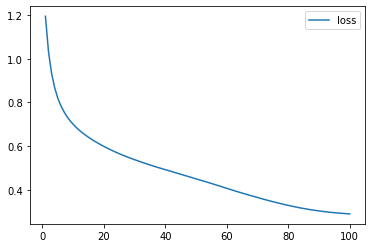

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

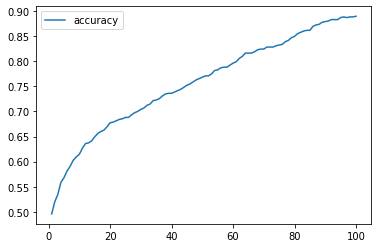

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [ ]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.8218 - accuracy: 0.3640
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.3760
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7549 - accuracy: 0.3893
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.4093
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4267
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.4453
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6559 - accuracy: 0.4667
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.4853
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.5107
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 0.5600
Epoch 11/